# New Section

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

main_path = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh'
persons = os.listdir(main_path)

for person in persons:
    person_path = os.path.join(main_path, person)

    walks = os.listdir(person_path)
    for walk in walks:
        walk_path = os.path.join(person_path, walk)

        types = os.listdir(walk_path)
        for typeper in types:
            new_path = os.path.join(walk_path, typeper)
print(new_path)


KeyboardInterrupt: ignored

Enter the frame numberfyc-00_1-001


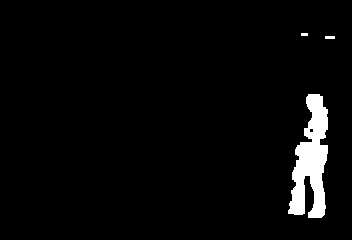

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
path = input("Enter the frame number")
ipath= '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh'
f=path.split('-')
fpath=ipath + '/' + f[0] + '/' +f[1] + '/' + path + '.png'
img=cv2.imread(fpath)
cv2_imshow(img)

In [ ]:
import cv2
for i in range (1, 76):
  if i<=9:
    path2 = 'fyc-00_1-00' + str(i)
  else:
    path2 =  'fyc-00_1-0' + str(i)
  new_path = ipath + '/' + f[0] + '/' +f[1] + '/' + path2 + '.png'
# Load the input image
  img = cv2.imread(new_path)

# Check if the image was successfully loaded
  if img is None:
    print('Error: Could not load input image')
  else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find the biggest contour
    biggest_contour = max(contours, key=cv2.contourArea)

    # Draw the biggest contour on the original image
    cv2.drawContours(img, [biggest_contour], -1, (0, 255, 0), 2)

    # Get the bounding box for the contour
    x, y, w, h = cv2.boundingRect(biggest_contour)

    # Crop the image to the bounding box
    crop = img[y:y+h, x:x+w]

    # Remove the green color from the contour highlight
    crop[np.where((crop == [0, 255, 0]).all(axis=2))] = [0, 0, 0]

    # Save the cropped image
    cv2.imwrite('/content/gdrive/MyDrive/Project Gait Analysis/Result/fyc001crop/cropped_img' + str(i)+'.jpg', crop)
    #cv2_imshow(crop)

In [ ]:
#List of full images
full = []
for i in range(1,76):
  crop_img_path1 = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh/fyc/00_1/fyc-00_1-00' + str(i) +'.png'
  crop_img_path2 = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh/fyc/00_1/fyc-00_1-0' + str(i) +'.png'
  if i<10:
    full.append(crop_img_path1)
  elif i<76:
    full.append(crop_img_path2)

In [ ]:
import os
import cv2
import numpy as np

# Define the directory where the images are located
image_dir = '/content/gdrive/MyDrive/Project Gait Analysis/Dataset/GaitDatasetA-silh/fyc/00_1'

# Get a list of all the image file names in the directory
image_filenames = os.listdir(image_dir)

In [ ]:
# Iterate over each image file
for image_filename in image_filenames:
    # Load the image
    image = cv2.imread(os.path.join(image_dir, image_filename))

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Change the data type of the array to float32
    image_array = image_array.astype('float32')

    # Normalize the array
    image_array = cv2.normalize(image_array, None, 0, 1, cv2.NORM_MINMAX)

    # Do any other processing you want to do on the normalized array
    # ...

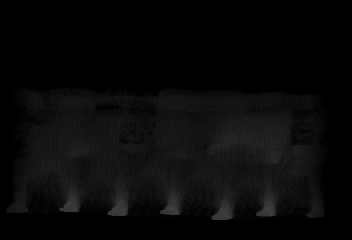

In [ ]:
import numpy as np
from PIL import Image
import cv2
# Load images into a list
images = [Image.open(f) for f in full]
# Convert images  mto NumPy arrays
image_arrays = [np.array(image) for image in images]

# Calculate average of the images
average_image = np.mean(image_arrays, axis=0)

# Convert average image back to an Image object
#average_image = Image.fromarray(np.uint8(average_image))

# Save the average image
#average_image.save('Average_image.jpg')
cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/Average Full image/average_image_full.jpg", average_image)
cv2_imshow(average_image)

In [ ]:
#List of cropped images
cropL = []
for i in range(1,76):
    crop_img_path = '/content/gdrive/MyDrive/Project Gait Analysis/Result/fyc001crop/cropped_img' + str(i) +'.jpg'
    cropL.append(crop_img_path)

In [ ]:
import os
import cv2
import numpy as np

# Define the directory where the images are located
image_dir = '/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES'

# Get a list of all the image file names in the directory
image_filenames = os.listdir(image_dir)

In [ ]:
# Iterate over each image file
for image_filename in image_filenames:
    # Load the image
    image = cv2.imread(os.path.join(image_dir, image_filename))

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Change the data type of the array to float32
    image_array = image_array.astype('float32')

    # Normalize the array
    image_array = cv2.normalize(image_array, None, 0, 1, cv2.NORM_MINMAX)

    # Do any other processing you want to do on the normalized array
    # ...

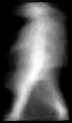

In [ ]:
import numpy as np
from PIL import Image
import cv2

# Load images into a list
images = [Image.open(f) for f in cropL]

# Get the size of the largest image
max_size = (0, 0)
for image in images:
    if image.size[0] > max_size[0]:
        max_size = image.size

# Resize all images to the size of the largest image
resized_images = [image.resize(max_size) for image in images]

# Convert images to NumPy arrays
image_arrays = [np.array(image) for image in resized_images]

# Calculate average of the images
average_image = np.mean(image_arrays, axis=0)

# Convert the average image to 8-bit integers
average_image = np.uint8(average_image)

#convert to  cv2 format
average_image = cv2.cvtColor(average_image, cv2.COLOR_RGB2BGR)

# Save the average image
cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/Average cropped image/average_image_full.jpg", average_image)
cv2_imshow(average_image)

In [ ]:
import cv2
for i in range(1,76):
  new_path = '/content/gdrive/MyDrive/Project Gait Analysis/Result/CROPPED IMAGES/cropped_img' + str(i) +'.jpg'
# Load the image
  img = cv2.imread(new_path)
  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply binary thresholding
  ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Find the biggest contour
  biggest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the person
  x, y, w, h = cv2.boundingRect(biggest_contour)

# Divide the bounding box into three regions (head, torso, legs)
  head = img[y:y+h//5, x:x+w]
  torso = img[y+h//5:y+(2*h)//4, x:x+w]
  legs = img[y+(2*h)//4:y+h, x:x+w]

# Save the regions
  cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/head/head" + str(i) + ".jpg", head)
  #cv2_imshow(head)
  cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/torso/torso" + str(i) + ".jpg", torso)
  #cv2_imshow(torso)
  cv2.imwrite("/content/gdrive/MyDrive/Project Gait Analysis/Result/legs/legs" + str(i) + ".jpg", legs)
  #cv2_imshow(legs)

In [ ]:
import cv2
import numpy as np
head_cen_x=[]
head_cen_y=[]

for i in range(1,76):
  new_path = "/content/gdrive/MyDrive/Project Gait Analysis/Result/head/head" + str(i) + ".jpg"
  # Load image
  image = cv2.imread(new_path)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold image to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it corresponds to the body)
  largest_contour = max(contours, key=cv2.contourArea)

  # Find the moments of the largest contour
  moments = cv2.moments(largest_contour)
  # Calculate the centroid of the contour
  centroid_x = int(moments["m10"] / moments["m00"])
  centroid_y = int(moments["m01"] / moments["m00"])

  #append centroid in list
  head_cen_x.append(centroid_x)
  head_cen_y.append(centroid_y)

  # Print the centroid
  #print("Centroid of the body: (", centroid_x, ",", centroid_y, ")")

In [ ]:
import cv2
import numpy as np
torso_cen_x=[]
torso_cen_y=[]

for i in range(1,76):
  new_path = "/content/gdrive/MyDrive/Project Gait Analysis/Result/torso/torso" + str(i) + ".jpg"
  # Load image
  image = cv2.imread(new_path)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold image to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it corresponds to the body)
  largest_contour = max(contours, key=cv2.contourArea)

  # Find the moments of the largest contour
  moments = cv2.moments(largest_contour)
  # Calculate the centroid of the contour
  centroid_x = int(moments["m10"] / moments["m00"])
  centroid_y = int(moments["m01"] / moments["m00"])

  #append centroid in list
  torso_cen_x.append(centroid_x)
  torso_cen_y.append(centroid_y)

  # Print the centroid
  #print("Centroid of the body: (", centroid_x, ",", centroid_y, ")")

In [ ]:
import cv2
import numpy as np
legs_cen_x=[]
legs_cen_y=[]

for i in range(1,76):
  new_path = "/content/gdrive/MyDrive/Project Gait Analysis/Result/legs/legs" + str(i) + ".jpg"
  # Load image
  image = cv2.imread(new_path)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Threshold image to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  # Find the largest contour (assuming it corresponds to the body)
  largest_contour = max(contours, key=cv2.contourArea)

  # Find the moments of the largest contour
  moments = cv2.moments(largest_contour)

  # Calculate the centroid of the contour
  centroid_x = int(moments["m10"] / moments["m00"])
  centroid_y = int(moments["m01"] / moments["m00"])

  #append centroid in list
  legs_cen_x.append(centroid_x)
  legs_cen_y.append(centroid_y)

  # Print the centroid
  #print("Centroid of the body: (", centroid_x, ",", centroid_y, ")")

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


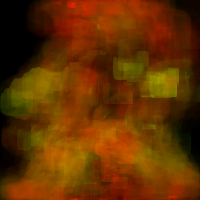

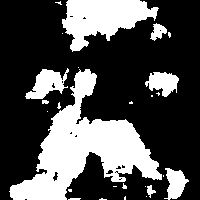

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
def optical_flow_mean(images_folder):
    image_paths = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith(".jpg")]
    image_paths.sort()

    common_size = (200, 200)
    prev_gray = None
    sum_of_flow = None
    num_images = 0

    for i in range(0, len(image_paths), 2):
        if i + 1 >= len(image_paths):
          break
        else:
            current_image = cv2.imread(image_paths[i])
            current_image = cv2.resize(current_image, common_size)
            current_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            next_image = cv2.imread(image_paths[i + 1])
            next_image = cv2.resize(next_image, common_size)
            next_gray = cv2.cvtColor(next_image, cv2.COLOR_BGR2GRAY)
            if prev_gray is None:
                prev_gray = current_gray
            flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            if sum_of_flow is None:
                sum_of_flow = np.abs(flow)
            else:
                sum_of_flow += np.abs(flow)
            prev_gray = next_gray
            num_images += 2
    avg_flow = sum_of_flow / num_images
    avg_flow = (avg_flow * 255 / np.max(avg_flow)).astype(np.uint8)
    return avg_flow
folder = "/content/gdrive/MyDrive/Project Gait Analysis/Result/fyc001crop"
avg_flow = optical_flow_mean(folder)
cv2.waitKey(0)
cv2.destroyAllWindows()
def visualize_flow(flow):
    h, w = flow.shape[:2]
    hsv = np.zeros((h, w, 3), dtype=np.float32)
    print(hsv)
    hsv[..., 1] = 255
    flow_magnitude, flow_angle = cv2.cartToPolar(flow[..., 0].astype(np.float32), flow[..., 1].astype(np.float32))
    hsv[..., 0] = flow_angle * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(flow_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    bgr = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    return bgr
def visualize_flow_bw(flow):
    h, w = flow.shape[:2]
    flow_magnitude, flow_angle = cv2.cartToPolar(flow[..., 0].astype(np.float32), flow[..., 1].astype(np.float32))
    flow_magnitude = cv2.normalize(flow_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, bw = cv2.threshold(flow_magnitude, 128, 255, cv2.THRESH_BINARY)
    return bw

avg_flow = optical_flow_mean(folder)
bgr = visualize_flow(avg_flow)
cv2_imshow(bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

avg_flow = optical_flow_mean(folder)
bgr = visualize_flow_bw(avg_flow)
cv2_imshow(bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

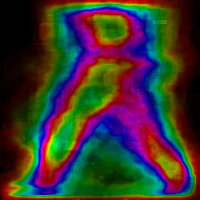

In [ ]:
import cv2
import numpy as np

# Load the optical flow result (HSV image)
optical_flow = cv2.imread('/content/gdrive/MyDrive/Project Gait Analysis/opfl/syj/00_3/syj00_3:colour.jpg')
optical_flow_hsv = cv2.cvtColor(optical_flow, cv2.COLOR_BGR2HSV)

# Select the desired layer (e.g., 's') from the HSV image
selected_layer = optical_flow_hsv[:,:,1]

# Load the additional image
additional_image = cv2.imread('/content/gdrive/MyDrive/Project Gait Analysis/avg image crop/syj/00_3/average_image_crop.jpg:syj00_3.jpg')

# Resize the additional image to match the dimensions of the optical flow result
additional_image_resized = cv2.resize(additional_image, (selected_layer.shape[1], selected_layer.shape[0]))

# Replace the selected layer with the corresponding channel from the additional image
modified_optical_flow = np.copy(optical_flow_hsv)
modified_optical_flow[:,:,0] = additional_image_resized[:,:,1]  # Replace '1' with the desired channel index

# Convert the modified HSV optical flow result back to RGB color space
modified_optical_flow_rgb = cv2.cvtColor(modified_optical_flow, cv2.COLOR_HSV2BGR)

# Display the modified optical flow result
cv2_imshow(modified_optical_flow_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

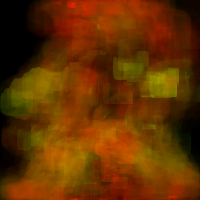

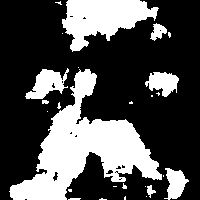

'\ncv2.waitKey(0)\ncv2.destroyAllWindows()\navg_flow = optical_flow_mean(folder)\nbgr = visualize_flow(avg_flow)\ncv2_imshow(bgr)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\navg_flow = optical_flow_mean(folder)\nbgr = visualize_flow_bw(avg_flow)\ncv2_imshow(bgr)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
def optical_flow_mean(images_folder):
    image_paths = [os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith(".jpg")]
    image_paths.sort()

    common_size = (200, 200)
    prev_gray = None
    sum_of_flow = None
    num_images = 0

    for i in range(0, len(image_paths), 2):
        if i + 1 >= len(image_paths):
            break
        else:
            current_image = cv2.imread(image_paths[i])
            current_image = cv2.resize(current_image, common_size)
            current_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            next_image = cv2.imread(image_paths[i + 1])
            next_image = cv2.resize(next_image, common_size)
            next_gray = cv2.cvtColor(next_image, cv2.COLOR_BGR2GRAY)

            if prev_gray is None:
                prev_gray = current_gray

            flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

            if sum_of_flow is None:
                sum_of_flow = np.abs(flow)
            else:
                sum_of_flow += np.abs(flow)

            prev_gray = next_gray
            num_images += 2

    if sum_of_flow is None:
        return None  # Return None if no images were processed

    avg_flow = sum_of_flow / num_images
    avg_flow = (avg_flow * 255 / np.max(avg_flow)).astype(np.uint8)
    return avg_flow

def visualize_flow(flow):
    h, w = flow.shape[:2]
    hsv = np.zeros((h, w, 3), dtype=np.float32)
    hsv[..., 1] = 255
    flow_magnitude, flow_angle = cv2.cartToPolar(flow[..., 0].astype(np.float32), flow[..., 1].astype(np.float32))
    hsv[..., 0] = flow_angle * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(flow_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    bgr = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    return bgr
def visualize_flow_bw(flow):
    h, w = flow.shape[:2]
    flow_magnitude, flow_angle = cv2.cartToPolar(flow[..., 0].astype(np.float32), flow[..., 1].astype(np.float32))
    flow_magnitude = cv2.normalize(flow_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, bw = cv2.threshold(flow_magnitude, 128, 255, cv2.THRESH_BINARY)
    return bw
folder = "/content/gdrive/MyDrive/Project Gait Analysis/Result/fyc001crop"
avg_flow = optical_flow_mean(folder)
if avg_flow is not None:
    bgr = visualize_flow(avg_flow)
    bw=visualize_flow_bw(avg_flow)
    cv2_imshow(bgr)
    cv2_imshow(bw)
else:
    print("No images found in the folder.")

cv2.waitKey(0)
cv2.destroyAllWindows()
avg_flow = optical_flow_mean(folder)
bgr = visualize_flow(avg_flow)
cv2_imshow(bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

avg_flow = optical_flow_mean(folder)
bgr = visualize_flow_bw(avg_flow)
cv2_imshow(bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
l=[2,4,6,8]
a=[1,2,3,4]
print(l+a)

[2, 4, 6, 8, 1, 2, 3, 4]


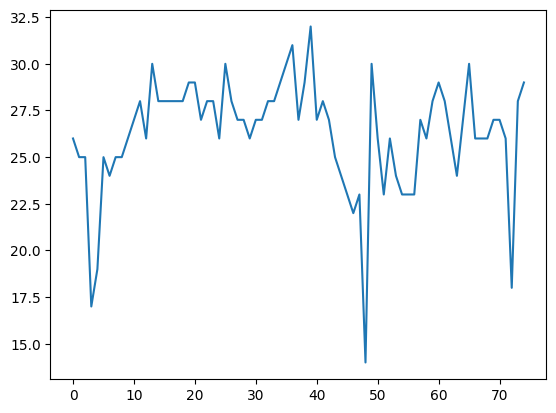

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#arr=np.array(torso_cen_y)

plt.plot(legs_cen_y)
#plt.yticks(range(0, 100, 20))

# Show the plot
plt.show()

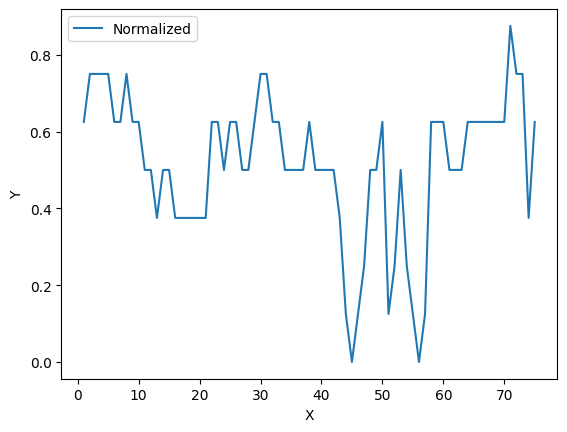

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = []
for i in range(1,76):
  x.append(i)
y =[head_cen_y,torso_cen_y,legs_cen_y]

for i in range y:
  if i[0]=='head':
      # Define the optimized range
      optimized_min = 14
      optimized_max = 22
  if i[0]=='torso':
      # Define the optimized range
      optimized_min = 14
      optimized_max = 22
  if i[0]=='legs':
      # Define the optimized range
      optimized_min = 14
      optimized_max = 22

    # Normalize the data and extrapolate if needed
    normalized_y = np.interp(y, (optimized_min, optimized_max), (0, 1), left=np.nan, right=np.nan)

    # Extrapolate previous value if outside the range
    for i in range(1, len(normalized_y)):
        if np.isnan(normalized_y[i]):
            normalized_y[i] = normalized_y[i - 1]

    # Plot the original and normalized data
    plt.plot(x, normalized_y, label='Normalized')
    #plt.plot(x,y,label='original')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


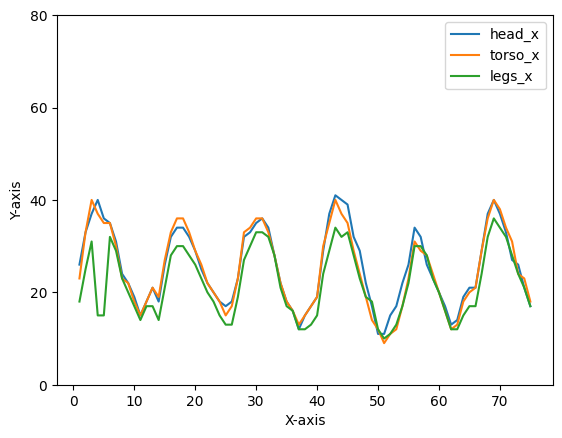

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some data
x = []
for i in range(1,76):
  x.append(i)

y1=head_cen_x
y2=torso_cen_x
y3=legs_cen_x
plt.plot(x, y1, label='head_x')
plt.plot(x, y2, label='torso_x')
plt.plot(x, y3, label='legs_x')
plt.yticks(range(0,100,20))

# Add legend and axis labels
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot the data
#plt.plot(x, y)

plt.show()

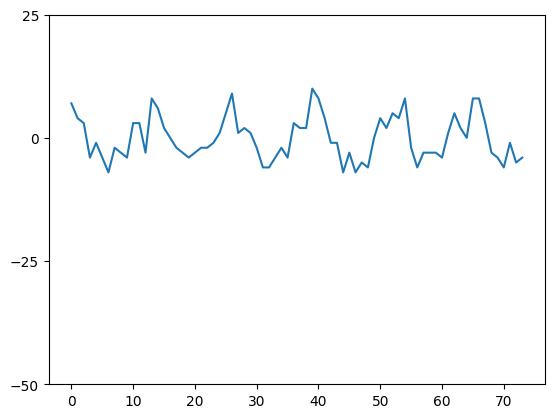

In [ ]:
l=[]
for i in range(0,len(head_cen_x)-1):
  d=head_cen_x[i+1]-head_cen_x[i]
  l.append(d)
plt.plot(l)
plt.yticks(range(-50, 50, 25))
plt.show()



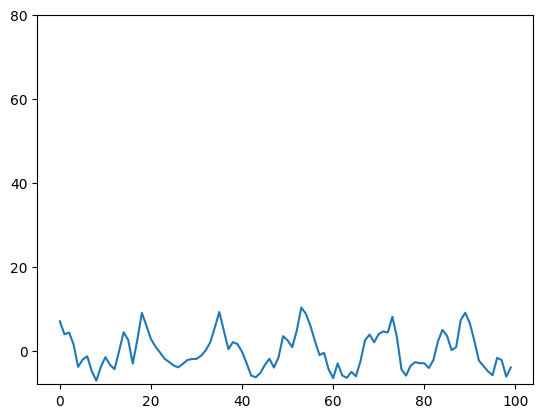

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Sample data points
x=[]
for i in range(1,75):
  x.append(i)
y = np.array(l)

# Create spline interpolation function
f = interp1d(x, y, kind='cubic')

# Define new x values for interpolation
x_new = np.linspace(1, 74, num=100)

# Perform interpolation
y_new = f(x_new)

plt.plot(y_new)
plt.yticks(range(0,100,20))
plt.show()

In [ ]:
print(head_cen_x)

[26, 33, 37, 40, 36, 35, 31, 24, 22, 19, 15, 18, 21, 18, 26, 32, 34, 34, 32, 29, 25, 22, 20, 18, 17, 18, 23, 32, 33, 35, 36, 34, 28, 22, 18, 16, 12, 15, 17, 19, 29, 37, 41, 40, 39, 32, 29, 22, 17, 11, 11, 15, 17, 22, 26, 34, 32, 26, 23, 20, 17, 13, 14, 19, 21, 21, 29, 37, 40, 37, 33, 27, 26, 21, 17]


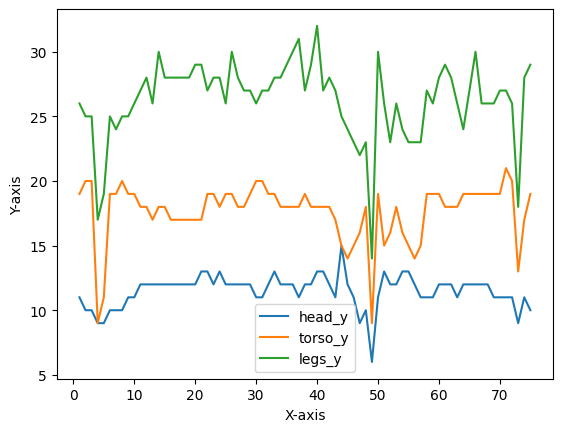

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some data
x = []
for i in range(1,76):
  x.append(i)

y1=head_cen_y
y2=torso_cen_y
y3=legs_cen_y
plt.plot(x, y1, label='head_y')
plt.plot(x, y2, label='torso_y')
plt.plot(x, y3, label='legs_y')

# Add legend and axis labels
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Plot the data
#plt.plot(x, y)

plt.show()

In [ ]:
pip install tsfresh

In [ ]:
import pandas as pd
# Convert the list to a pandas DataFrame
df_head = pd.DataFrame({'id': 'head', 'time': range(len(head_cen_x)), 'x':head_cen_x, 'y':head_cen_y})
df_torso=pd.DataFrame({'id': 'torso', 'time': range(len(torso_cen_x)), 'x':torso_cen_x, 'y':torso_cen_y})
df_legs=pd.DataFrame({'id': 'legs', 'time': range(len(legs_cen_x)), 'x':legs_cen_x, 'y':legs_cen_y})
df=pd.concat([df_head, df_torso,df_legs],axis=0)
print(df)

      id  time   x   y
0   head     0  26  11
1   head     1  33  10
2   head     2  37  10
3   head     3  40   9
4   head     4  36   9
..   ...   ...  ..  ..
70  legs    70  32  27
71  legs    71  28  26
72  legs    72  24  18
73  legs    73  21  28
74  legs    74  17  29

[225 rows x 4 columns]


In [ ]:
from tsfresh import extract_features
import pandas as pd

# Extract the features
extracted_features = extract_features(df, column_id="id", column_sort="time", column_kind=None, column_value=None)
print(extracted_features)

In [ ]:
import tsfresh.feature_extraction.feature_calculators as fc
import pandas as pd
import numpy as np

timeseries = [head_cen_x, head_cen_y, torso_cen_x, torso_cen_y, legs_cen_x, legs_cen_y]
df_features = pd.DataFrame()

for i, series in enumerate(timeseries):
    arr = np.array(series)
    a = fc.abs_energy(arr)
    b = fc.mean(arr)
    c = fc.sample_entropy(arr)
    d = fc.standard_deviation(arr)
    e = fc.skewness(arr)

    features = {'id': ['fyc-00_1'], 'time': ['5'], 'abs_energy': [a], 'mean': [b], 'sample_entropy': [c], 'standard_deviation': [d], 'skewness': [e]}
    df = pd.DataFrame(features)
    df_features = pd.concat([df_features, df], ignore_index=True)

print(df_features)

         id time  abs_energy       mean  sample_entropy  standard_deviation  \
0  fyc-00_1    5       54111  25.560000        1.460402            8.256295   
1  fyc-00_1    5       10024  11.493333        0.776144            1.247647   
2  fyc-00_1    5       52334  25.013333        1.119232            8.492339   
3  fyc-00_1    5       23684  17.626667        1.049015            2.255502   
4  fyc-00_1    5       40375  22.040000        0.852212            7.250637   
5  fyc-00_1    5       52438  26.266667        1.694596            3.039006   

   skewness  
0  0.146269  
1 -1.224628  
2  0.081994  
3 -2.005008  
4  0.171912  
5 -1.539528  


In [ ]:
import tsfresh.feature_extraction.feature_calculators as fc
import pandas as pd
import numpy as np

timeseries = [head_cen_x, head_cen_y, torso_cen_x, torso_cen_y, legs_cen_x, legs_cen_y]
df_features = pd.DataFrame()

for i, series in enumerate(timeseries):
    arr = np.array(series)
    a = fc.abs_energy(arr)
    b = fc.mean(arr)
    c = fc.sample_entropy(arr)
    d = fc.standard_deviation(arr)
    e = fc.skewness(arr)

    features = {'abs_energy': a, 'mean': b, 'sample_entropy': c, 'standard_deviation': d, 'skewness': e}
    df = pd.DataFrame(features, index=[i])
    df_features = pd.concat([df_features, df])

df_id = pd.DataFrame({'id': ['fyc-00_1']})
df_id = df_id.reindex(df_features.index)  # Make sure the index matches df_features

df_features = pd.concat([df_id, df_features], axis=1)

# Set the 'time' column
df_features['time'] = ['5'] * len(df_features)

# Reshape the DataFrame to have a single row and 30 columns
df_features = df_features.stack().reset_index(drop=True).to_frame().T

# Display the DataFrame
print(df_features)

         0      1      2         3         4         5  6      7          8   \
0  fyc-00_1  54111  25.56  1.460402  8.256295  0.146269  5  10024  11.493333   

         9   ...        27        28        29 30     31         32        33  \
0  0.776144  ...  0.852212  7.250637  0.171912  5  52438  26.266667  1.694596   

         34        35 36  
0  3.039006 -1.539528  5  

[1 rows x 37 columns]


In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/gdrive')

# Load the saved variable from file
with open('/content/gdrive/MyDrive/Project Gait Analysis/Result/dataset features.txt', 'rb') as file:
    df = pickle.load(file)

# Now you can use the loaded variable
print(df)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
          0       1          2         3          4         5      6   \
0    wl-00_4   78043  41.878049  2.197225  12.235883  0.061837  11325   
1    wl-00_2   82102   43.02439   1.94591   12.30405 -0.071996  12003   
2    wl-00_3  101067  41.901961  1.558145   15.03102  0.223386  15468   
3    wl-00_1   72362  41.783784  1.098612  14.486033  0.074769  11068   
4   wyc-00_3   17187       16.5  1.435085   6.784377   0.91736   3655   
..       ...     ...        ...       ...        ...       ...    ...   
79   zl-00_1   60326  36.684211   1.94591  15.549759 -0.163242   6383   
80  zyf-00_4   79990  34.819672       inf   9.944944 -0.043869  13984   
81  zyf-00_3   54365  26.742424  2.140066  10.418967   0.23469  13922   
82  zyf-00_1   44502  27.607843  1.845827  10.506914  0.346208  11192   
83  zyf-00_2   70131  33.362069  2.014903   9.804465 -0.022348  12

In [ ]:
import pandas as pd
import numpy as np

# Remove a column by location (index)
column_index = 0  # Index of the column to be removed
df_without_column = df.drop(df.columns[column_index], axis=1)

# Convert the removed column to a NumPy array
column_array = df.iloc[:, column_index].to_numpy()

# Print the modified dataframe and the column array
print("Dataframe without the column:")
print(df_without_column)
print("\nColumn as a NumPy array:")
print(column_array)


Dataframe without the column:
        1          2         3          4         5      6          7   \
0    78043  41.878049  2.197225  12.235883  0.061837  11325  16.560976   
1    82102   43.02439   1.94591   12.30405 -0.071996  12003   17.04878   
2   101067  41.901961  1.558145   15.03102  0.223386  15468  17.372549   
3    72362  41.783784  1.098612  14.486033  0.074769  11068  17.243243   
4    17187       16.5  1.435085   6.784377   0.91736   3655   7.833333   
..     ...        ...       ...        ...       ...    ...        ...   
79   60326  36.684211   1.94591  15.549759 -0.163242   6383  12.552632   
80   79990  34.819672       inf   9.944944 -0.043869  13984  15.114754   
81   54365  26.742424  2.140066  10.418967   0.23469  13922  14.484848   
82   44502  27.607843  1.845827  10.506914  0.346208  11192  14.784314   
83   70131  33.362069  2.014903   9.804465 -0.022348  12334  14.551724   

          8         9         10  ...     21         22        23         24  \
0

In [ ]:
import pickle

# Variable to be saved
my_variable =df_without_column

# Save the variable to a file
with open('/content/gdrive/MyDrive/Project Gait Analysis/Result/dataset without names.txt', 'wb') as file:
    pickle.dump(my_variable, file)


In [ ]:
# Load the saved variable from file
with open('/content/gdrive/MyDrive/Project Gait Analysis/Result/array of names in order.txt', 'rb') as file:
    df = pickle.load(file)

l=[]
for i in df:
  a=i.split('-')
  l.append(a[0])
print(l)

['wl', 'wl', 'wl', 'wl', 'wyc', 'wyc', 'wyc', 'wyc', 'fyc', 'fyc', 'fyc', 'fyc', 'hy', 'hy', 'hy', 'hy', 'ljg', 'ljg', 'ljg', 'ljg', 'lqf', 'lqf', 'lqf', 'lqf', 'lsl', 'lsl', 'lsl', 'lsl', 'ml', 'ml', 'ml', 'ml', 'nhz', 'nhz', 'nhz', 'nhz', 'rj', 'rj', 'rj', 'rj', 'syj', 'syj', 'syj', 'syj', 'wl', 'wl', 'wl', 'wl', 'wq', 'wq', 'wq', 'wq', 'xch', 'xch', 'xch', 'xch', 'xxj', 'xxj', 'xxj', 'xxj', 'yjf', 'yjf', 'yjf', 'yjf', 'zc', 'zc', 'zc', 'zc', 'zdx', 'zdx', 'zdx', 'zdx', 'zjg', 'zjg', 'zjg', 'zjg', 'zl', 'zl', 'zl', 'zl', 'zyf', 'zyf', 'zyf', 'zyf']
